In [71]:
# Origin: Code for week 6 of programming class.
# Author: Tyler Abbot
# Title: week_6_code.ipynb
# Last modified: 2016.10.05

# Introduction

Today's class will be a review of things we've seen so far.

## Today's Objective

Our goal for the day is to reinforce the concepts we've learned so far and provide you with time to better incorporate these ideas. We'll briefly cover some examples on:
1. Variable creation and manipulation.
2. Matix creation and manipulation.
3. Useful packages for generating random variables.

If by the end of the class, you feel we haven't sufficiently covered one of these, speak up!

## A Working Example : Random Graphs

Today's example, although somewhat abstract, will try to cover many of the ideas we've already seen, while using a hot topic in economics: **networks**.

One can think of many examples of economic networks: production networks within a company or industry, social networks, professional networks, financial networks, etc. Recently economists have become much more interested in the application of the ideas in network theory to many problems, see for example the <a href="https://sites.google.com/site/maryamfarboodi/research" target="_blank">work by Farboodi</a> for current applications to finance and literature review (in her papers).

Today we will look to creat one part of a network model: **the adjacency matrix**. This is a matrix that indicates all of the connections between nodes in the model. Additionally, once we have created such a model for a given network, we'll expand our work to creat random networks for a given nodal structure, i.e. random graphs.

Great! Let's get started.

First we'll install a package that will help us with graphing our networks:

In [2]:
install.packages("igraph", repos='http://cran.us.r-project.org')

also installing the dependencies ‘codetools’, ‘xtable’, ‘iterators’, ‘pkgmaker’, ‘registry’, ‘rngtools’, ‘cluster’, ‘gridBase’, ‘foreach’, ‘doParallel’, ‘Matrix’, ‘NMF’, ‘irlba’



In [1]:
require(igraph)

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



### A First Graph

As a first example, let's take a simple **star network** like the one in the following image:
![star graph](star.png)
You could think of this as a simple model of a banking network, with small regional banks on the periphary and a large intermediary in the center.

To describe this graph, we need to number each of our nodes, here from $1$ to $6$. Then we need to define whether each node has a connection to each other node. For example the central node is connected to all peripheral nodes, while the peripheral nodes are connected only to the central node (**NOTE:** we could specify directions of connection, ie a directed graph, but we will assume all edges go both ways).

Once we have this information, we can generate our adjacency matrix. Let's label the central node $1$ and all the other node $2 - 6$, since order is unimportant here.

This implies that node $1$ is connected to nodes $2, 3, 4, 5$ and $6$, while all other nodes are only connected to node $1$. How does this look in the adjacency matrix? It is easiest shown directly:

$$
\begin{align*}
    \begin{bmatrix}
        0 & 1 & 1 & 1 & 1 & 1 \\
        1 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
\end{align*}
$$

Take a moment to try to understand what this matrix is saying. Each entry $(i, j)$ is $1$ when there is a connection **from** node $i$ to node $j$ exists, and zero otherwise. What would the matrix look like if we had a directed graph where all connections were from the periphary to the center? 

To plot our graph we'll simply apply naively the functions from `igraph`. Here is the syntax to plot a graph from an adjacency matrix:

```
plot(graph_from_adjacency_matrix(adjacency_matrix))
```
So let's create our matrix and our graph!

In [5]:
# Define the number of nodes
N <- 6

# Create a matrix of zeros
X <- matrix(rep(0, N*N), nrow=N)
X

# Fill the first row and first column with ones
for(i in 1:N){
    for(j in 1:N){
        if(i != j & (i == 1 | j == 1))
            X[i, j] = 1
    }
}
X

0,1,1,1,1,1
1,0,0,0,0,0
1,0,0,0,0,0
1,0,0,0,0,0
1,0,0,0,0,0
1,0,0,0,0,0


Great! Before we move on, take a moment to understand the above loop. What type of operators did we use? These operators produce what variable type? How to you read the if statement?

Ok, now we've got our adjacency matrix, let's (naively) plot our graph:

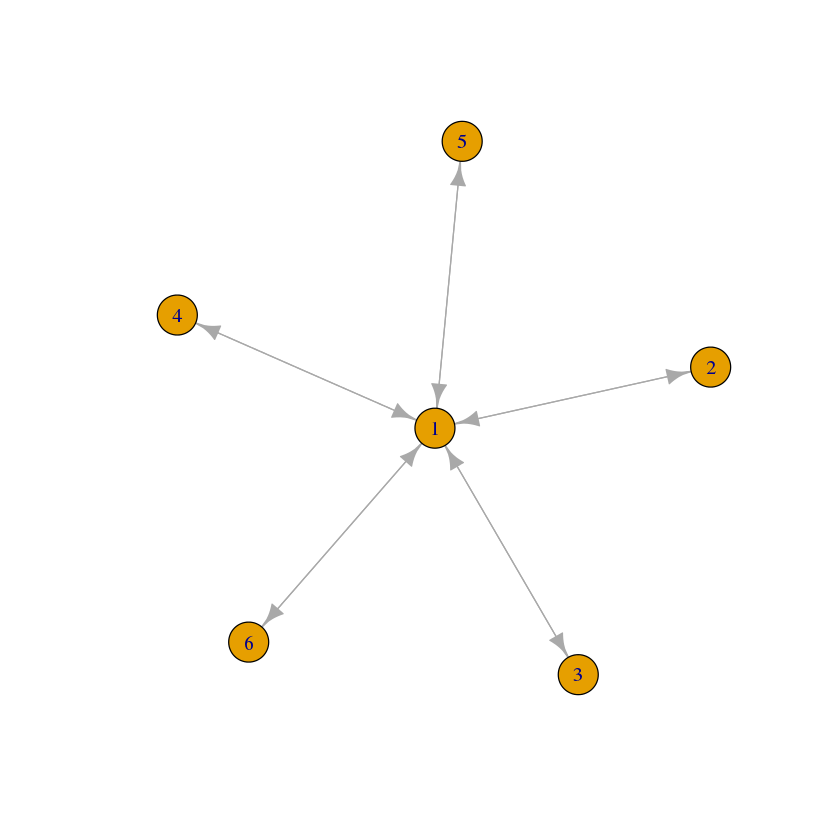

In [6]:
plot(graph_from_adjacency_matrix(X))

What?! We're so cool.

Ok, great! Now we know how to create a graph and plot it, but what if we wanted to create a random graph!

### A Random Graph

Now consider the case where we have a graph with $N$ nodes, but the structure of the graph is not determined before hand. We'll assume that the connections occur at random and each connection is independentand identically distributed, with the probability of a connection equal $p$ (remind you anything?).

**Sanity check:** if nodes cannot have connection to themselves, what is the maximum number of connections?!

Now to create our adjacency matrix there are several approaches and we'll look at each.

First, we can use the same approach as in class generating a random uniform variable for each entry in the graph:

0,1,0,1,0,0,0,1,0,1
1,0,0,1,1,0,1,1,0,1
0,1,0,1,1,1,1,0,0,1
0,1,1,0,0,1,0,1,1,0
1,1,1,1,0,0,0,1,1,1
1,0,0,0,0,0,1,1,1,1
1,0,0,1,0,0,0,0,1,1
0,1,1,1,1,0,1,0,1,1
1,0,1,1,1,0,1,0,0,1
0,1,1,1,1,0,1,1,1,0


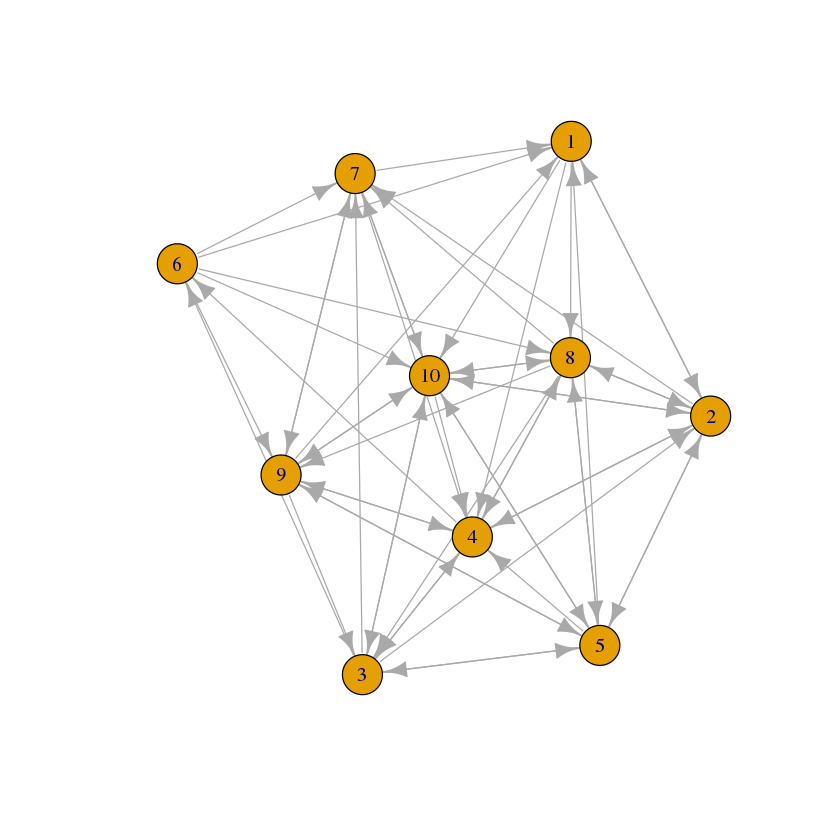

In [9]:
# Define the number of nodes
N <- 10

# Define the probability of a connection
p <- 0.6

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Loop over entries filling the adjacency matrix
for(i in 1:N){
    for(j in 1:N){
        if(i != j){
            if(runif(1) <= p){
                X[i, j] <- 1
            }
        }
    }
}

# Show the adjacency matrix
X

# Plot the graph
plot(graph_from_adjacency_matrix(X))

Again, very neat, but something's strange? Why do we now have a directed graph?!

Let's do the same thing again, but create a symmetric matrix... **wait!** How would you do this?

0,0,0,1,0,1,0,1,1,1
0,0,1,0,1,0,0,1,0,1
0,0,0,1,0,0,1,0,0,0
0,0,0,0,0,1,1,0,1,1
0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,1,1,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0


0,0,0,1,0,1,0,1,1,1
0,0,1,0,1,0,0,1,0,1
0,1,0,1,0,0,1,0,0,0
1,0,1,0,0,1,1,0,1,1
0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1
0,0,1,1,0,0,0,1,1,0
1,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,1
1,1,0,1,1,1,0,0,1,0


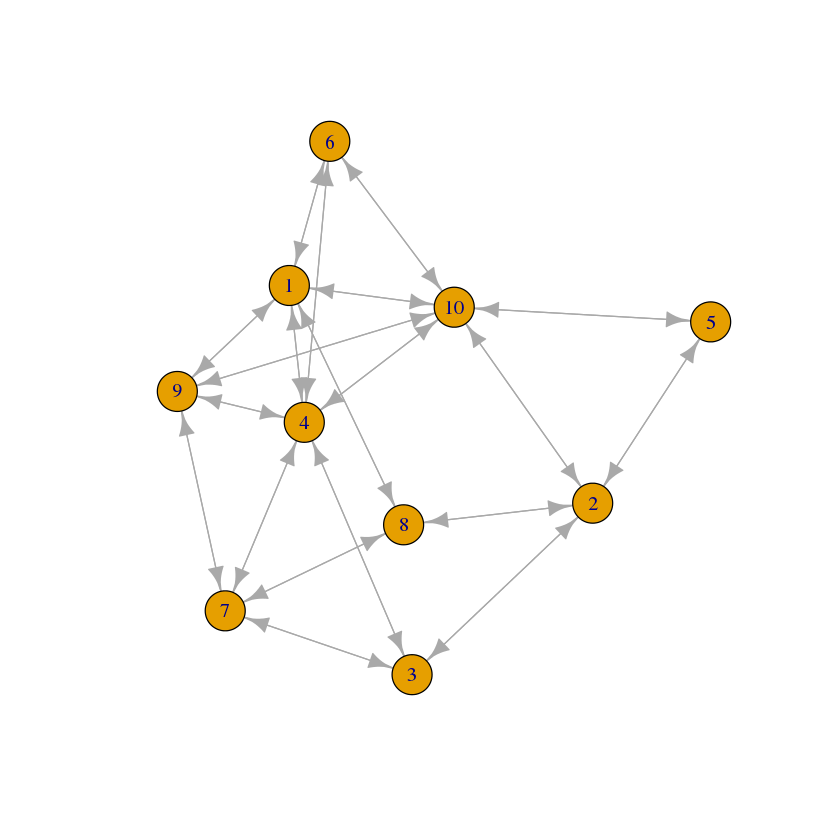

In [23]:
# Define the number of nodes
N <- 10

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Loop over entries filling the adjacency matrix
for(i in 1:(N-1)){
    for(j in (i+1):N){
        if(runif(1) <= p){
            X[i, j] <- 1
        }
    }
}

# Show the adjacency matrix
X
X <- X + t(X)
X

# Plot the graph
plot(graph_from_adjacency_matrix(X))

Great! Now we can at least create an example of a random network. However, our approach is going to be REALLY slow... why? What in particular is going to slow our functions down?

To make this faster, we'll **vectorize** the loops, that is convert the loops into calls to built in functions. To do this we "fold back" the loops, staring from the interior and working out. So what does the interior loop do?
```
for(j in (i+1):N){
    if(runif(1) <= p){
        X[i, j] <- 1
    }
}
```
This loop generates a series of $1$'s and $0$'s, of length $N-i$. In particular, let's print what this is doing:

In [31]:
p <- 0.5
N <- 10
i <- 3

for(j in (i+1):N){
    if(runif(1) <= p){
        print(1)
    }else{
        print(0) # This is implicit since the matrix X is zeros
    }
}

[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0


One option is to generate a vector of uniform random variables and check if it is less than $p$:

In [38]:
temp <- runif(N-i)
as.integer(temp <= p)

[1] 0 0 1 1 1 0 1

We can then loop over rows, replacing the internal loop with this:

In [48]:
# Define the number of nodes
N <- 10

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Loop over entries filling the adjacency matrix
for(i in 1:(N-1)){
    temp <- runif(N-i)
    X[i, (i+1):N] <- as.integer(temp <= p)
}

# Show the adjacency matrix
X


0,0,0,0,1,0,0,0,1,0
0,0,0,1,1,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,1
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0


This is what is meant by vectorizing. Now, consider the outermost loop. This one is a bit trickier, as we are creating vectors of different length on each iteration. To do this, we will use a different approach, namely to generate a **triangular matrix**, or a matrix with entries only above or below the diagonal. Here we'll make an **upper triangular matrix**, but a **lower triangular matrix** would work too.

First, how many non-zero entries could we possibly generate in the above loop? ... that's right, $\frac{N^2 - N}{2} = \frac{(N - 1)N}{2}$, for example when $N = 10$, $\frac{(N-1)N}{2} = 45$.

So, we'll create a vector of this length and fill in our adjacency matrix with that:

In [55]:
# Define the number of nodes
N <- 10

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Create the (possibly) non-zero entries of the upper triangle
temp <- runif(as.integer((N - 1)*N/2))

# Now use built in commands to fill the upper triangle
X[upper.tri(X)] = as.integer(temp <= p)

# Show the adjacency matrix
X
X <- X + t(X)

0,1,1,1,1,1,1,1,1,1
0,0,1,1,1,1,1,1,1,1
0,0,0,1,1,1,1,1,1,1
0,0,0,0,1,1,1,1,1,1
0,0,0,0,0,1,1,1,1,1
0,0,0,0,0,0,1,1,1,1
0,0,0,0,0,0,0,1,1,1
0,0,0,0,0,0,0,0,1,1
0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0


Finally, we can skip the additional step of generating a random uniform variable by generating a vector of ones and zeros directly, using the `sample` function:

In [59]:
# Define the number of nodes
N <- 10

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Now use built in commands to fill the upper triangle
X[upper.tri(X)] = sample(0:1, as.integer((N - 1)*N/2),
                         replace=T, prob=c(1 - p, p))

# Fill the lower half
X <- X + t(X)

### Number of Paths of Given Length

A neat fact of the adjacency matrix is that one can use it to calculate exactly how many paths there are of a given length between any two nodes.

Let's generate an example network to discuss:

0,1,1,1
1,0,1,1
1,1,0,0
1,1,0,0


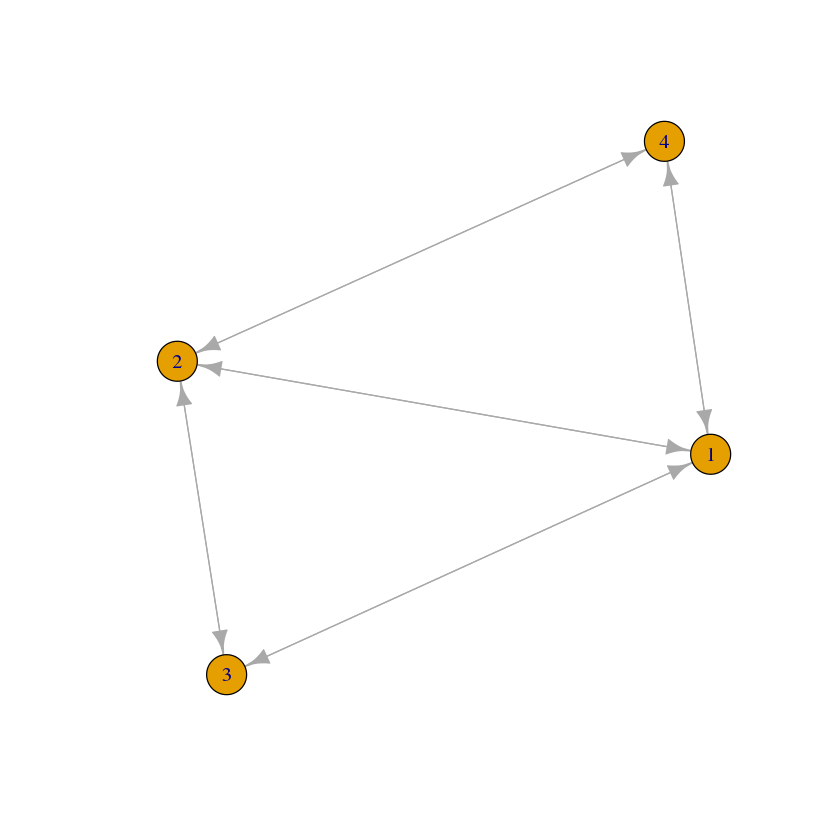

In [62]:
# Define the number of nodes
N <- 4

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Now use built in commands to fill the upper triangle
X[upper.tri(X)] = sample(0:1, as.integer((N - 1)*N/2),
                         replace=T, prob=c(1 - p, p))

# Fill the lower half
X <- X + t(X)
X
# Plot the graph
plot(graph_from_adjacency_matrix(X))

This graph is random, but we can talk in general about graphs. Take a look at the above plot and consider how many paths there are of length $1$ between any two nodes. How would you relate this to the adjacency matrix? In other words, what does the adjacency matrix say about connections of length $1$?

Now that that's out of the way, how many paths of length $2$ are there between any two nodes? Take for example the number of paths of length $2$ between nodes $1$ and $2$. To take a path of length $2$ you first take a step of length $1$ from node $1$ to any other node. Then, in order for this to lead to be a path of length $2$ to node $2$, you must be one step away from node $2$. So, any path from node $1$ to node $2$ of length $2$ must leave node $1$ and after one step be only one step away from node two. This number will turn out to be the dot product of the first row with the second column of $X$!

Because of this if you want to find the number of paths of length $2$ from any node to any other node, you simply multiply $XX$! More generally you could say that the matrix $X$ taken to the power $k$, ie $X^k$ will return a matrix containing the number of paths of length $k$ from any node to any other node.

Let's write a function to calculate this value!

In [ ]:
install.packages("expm", repos='http://cran.us.r-project.org')
require(expm)

In [73]:
paths_of_k <- function(X, k){
    return(X%^%k)
}
X
k <- 2
paths_of_k(X, k)

0,1,1,1
1,0,1,1
1,1,0,0
1,1,0,0


3,2,1,1
2,3,1,1
1,1,2,2
1,1,2,2


Cool! So now we can tell exactly how many possible paths there are of any given length.

### The Degree Distribution

The last thing we'll look at is called the **degree distribution**, or the distribution of the number of connections.

To do this, we need to use the adjacency matrix (of course) to calculate how many connections each node has. How would your do this using linear algebra?

Here's how I do it:

In [74]:
X %*% rep(1, N)

3
3
2
2


This is a vector containing the total number of connections for each node. How would you turn this into a distribution? Well, in this case there is only a small number of possiblities and we can just say that the probability of observing a node with $x$ connections is the cardinality of $x$ in the graph (the number of nodes with that many connections) divided by $N$.

Let's generate a more complex example:

In [78]:
# Define the number of nodes
N <- 1000

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Now use built in commands to fill the upper triangle
X[upper.tri(X)] = sample(0:1, as.integer((N - 1)*N/2),
                         replace=T, prob=c(1 - p, p))

# Fill the lower half
X <- X + t(X)

# Calculate the degree of each node
degree <- X %*% rep(1, N)
degree

315
304
295
305
302
315
299
292
286
286
303


This is not nearly as clear as before... but, we can visualize the data! How would you suggest doing this?

...that's a great idea! A histogram!

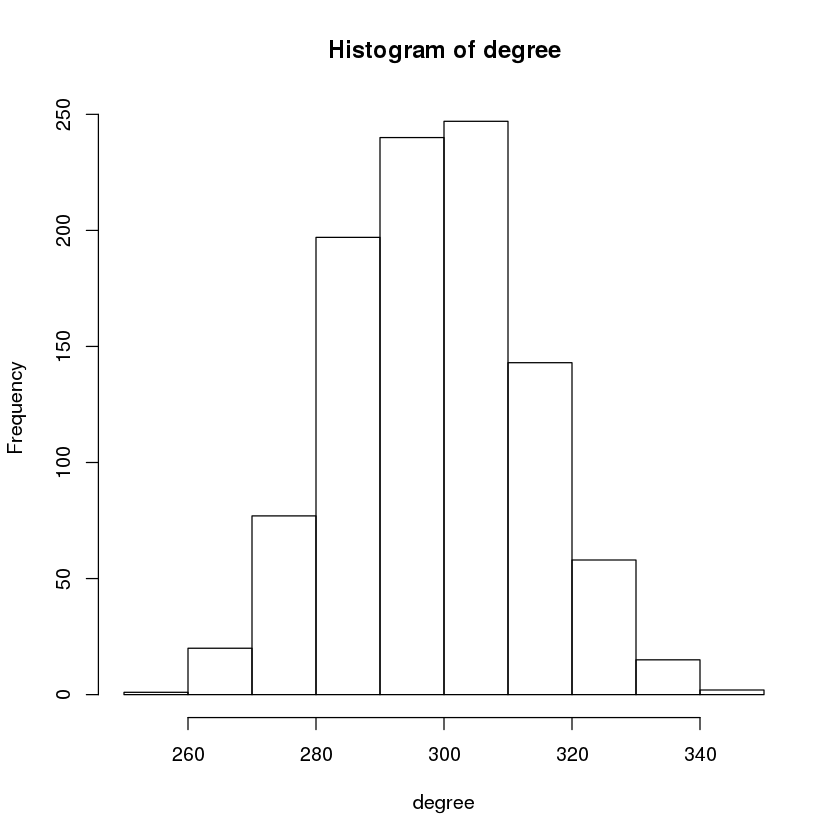

In [79]:
hist(degree)

We could also fit a **kernel density** (you'll learn about this in metrics 3):

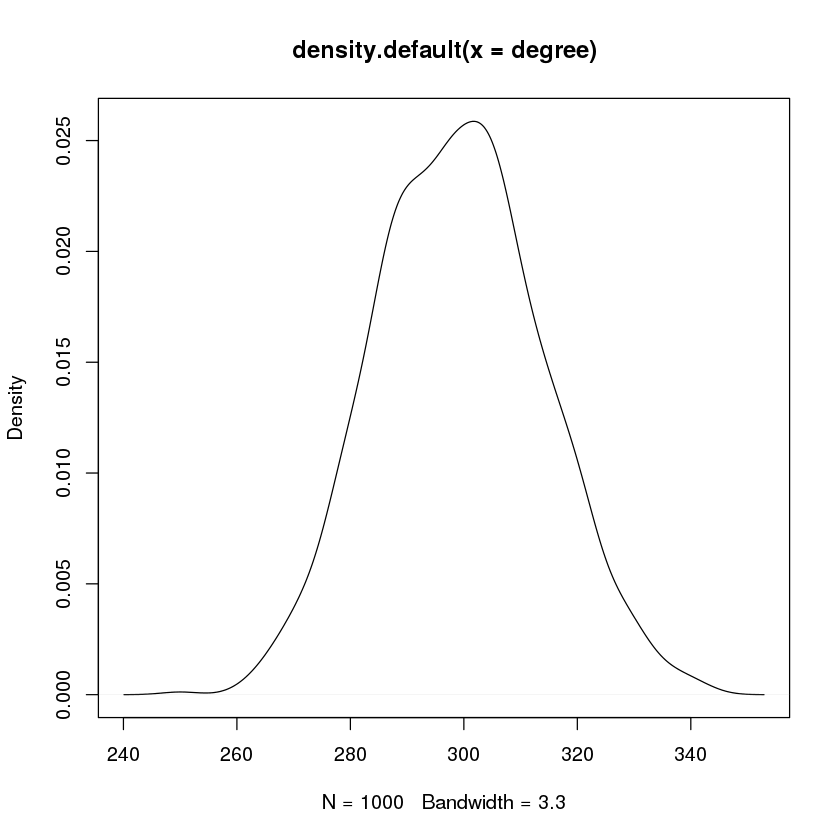

In [80]:
plot(density(degree))

What if we add a normal distribution to this plot? We can do that easily using built in functions:

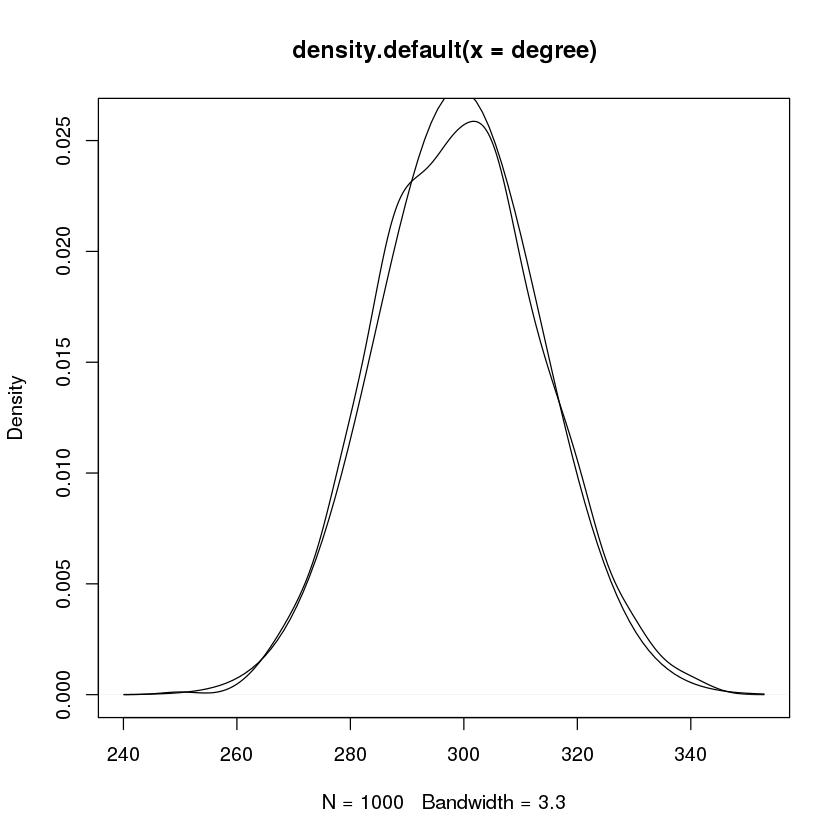

In [81]:
plot(density(degree))
curve(dnorm(x, mean=mean(degree), sd=sd(degree)), add=TRUE)

Finally, let's see what happens when we increase the number of nodes!

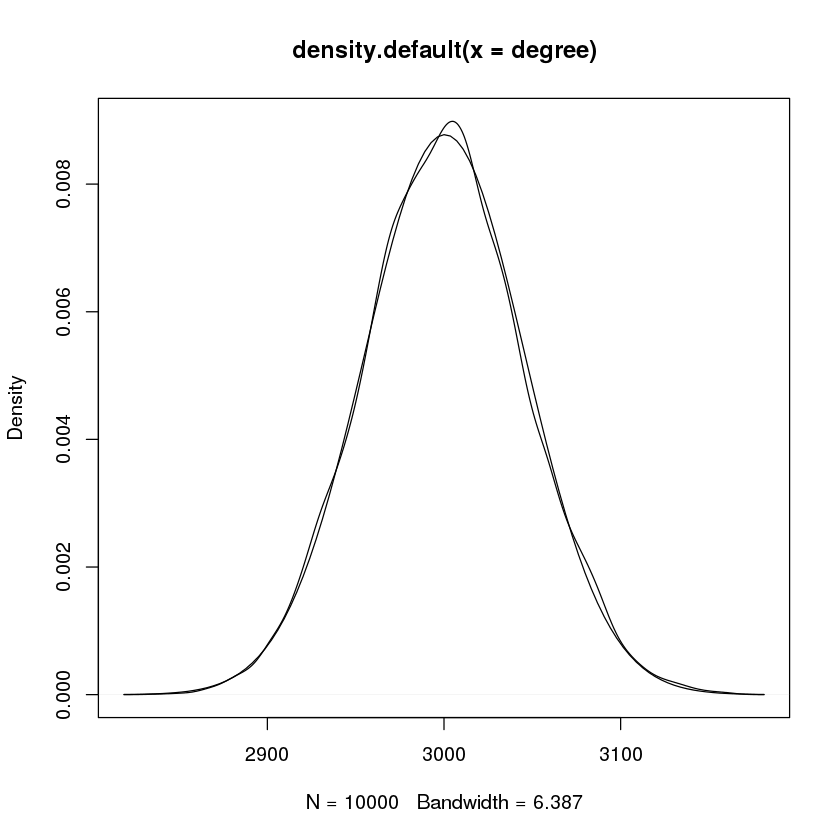

In [85]:
# Define the number of nodes
N <- 10000

# Define the probability of a connection
p <- 0.3

# Create an empty matrix to fill
X <- matrix(rep(0, N*N), nrow=N)

# Now use built in commands to fill the upper triangle
X[upper.tri(X)] = sample(0:1, as.integer((N - 1)*N/2),
                         replace=T, prob=c(1 - p, p))

# Fill the lower half
X <- X + t(X)

# Calculate the degree of each node
degree <- X %*% rep(1, N)

# Plot the degree distribution
plot(density(degree))
curve(dnorm(x, mean=mean(degree), sd=sd(degree)), add=TRUE)

Cool! Looks pretty good, so would you say a normal distribution is a good approximation of our random network?

... this is a trick question...

## Conclusion
That's it! You now know how to create random graphs in R. Hopefully this covered a review of the following:
1. Variable creation and manipulation.
2. Matix creation and manipulation.
3. Useful packages for generating random variables.

# Homework:

Today the homework is contained in a seperate notebook! Keep in mind it is very long and meant to allow you to work on whatever of the above topics you are most interested in improving!